<a href="https://colab.research.google.com/github/gregoriofsg/1563-treinando-pytorch/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
from torchvision import datasets , transforms

In [2]:
MNIST = datasets.MNIST('.',
                       train=False,
                       transform=transforms.ToTensor(),
                       download =True )



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [4]:
dado, rotulo = MNIST[0]
print(type(dado), type(rotulo))
print(dado.size(),rotulo)

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28]) 7


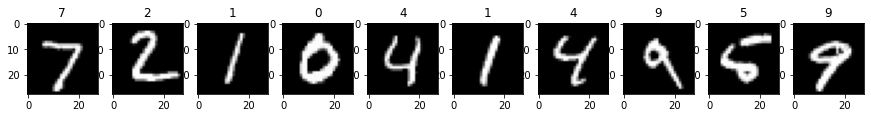

In [6]:
fig , axs = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
  dado,rotulo = MNIST[i]
  axs[i].imshow(dado[0], cmap='gray')
  axs[i].set_title(str(rotulo))



In [7]:
VOC = datasets.VOCDetection('.', 
                            image_set = 'train', 
                            download = True, 
                            transform = transforms.ToTensor(),)

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting ./VOCtrainval_11-May-2012.tar to .


<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])


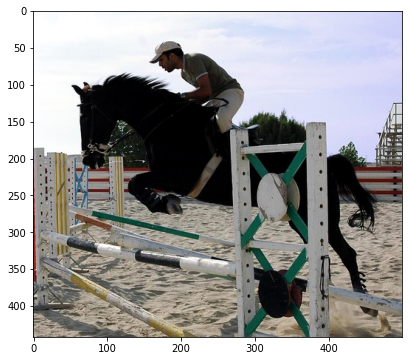

In [9]:
#pytorch canal da figura primeiro C x H x W , matplotlib canal por último
dado, rotulo = VOC[0]
print(type(dado), type(rotulo))
print(dado.size())
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

In [10]:
rotulo


{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

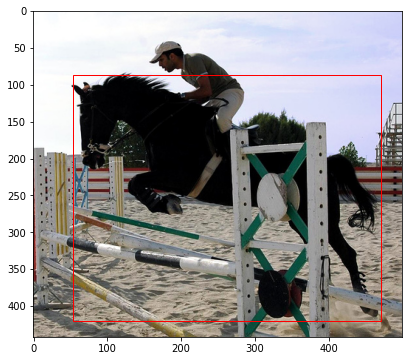

In [13]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int (bbox['xmax'])
xmin = int (bbox['xmin'])
ymax = int (bbox['ymax'])
ymin = int (bbox['ymin'])

fig , axs = plt.subplots(figsize=(8,6))
axs.imshow(dado)

w,h = xmax-xmin , ymax-ymin
rect = patches.Rectangle((xmin,ymin),w,h,fill=False,color='red')
axs.add_patch(rect)
plt.show()

In [15]:
VOCs = datasets.VOCSegmentation('.', 
                            image_set = 'val', 
                            download = False, 
                            transform = transforms.ToTensor(),
                            target_transform=transforms.ToTensor(),)
dado , rotulo = VOCs[0]

print(type(dado), type(rotulo))
print(dado.size(), rotulo.size())

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


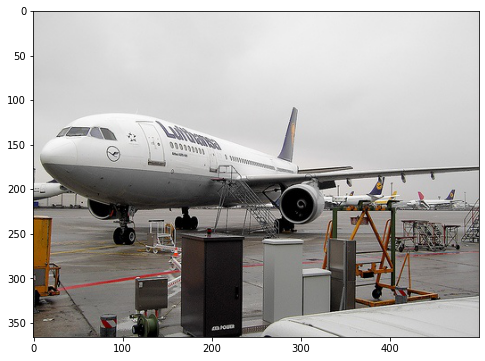

In [16]:
dado = dado.permute(1,2,0)
plt.figure(figsize=(8,6))
plt.imshow(dado)

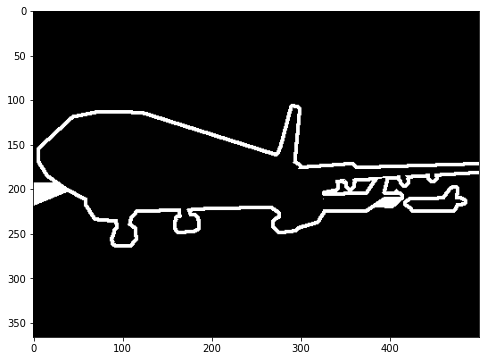

In [17]:
plt.figure(figsize=(8,6))
plt.imshow(rotulo[0], cmap='gray')